In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [3]:
from pandas.tseries.offsets import BDay

from util.file_util import StockTwitsFileReader, StockDataFileReader
# from util.stocktwits_helper import 
from util.stockdata_helper import (
    get_nday_returns_for_ticker, get_nday_mkt_adjusted_returns_for_ticker)

from util.ts_util import (
    shift_date_index, calc_corr, 
    resample_weekly, rolling_weekly)
from util.plot_util import plot_time_series_bar, overlay_on_secondary_axis
import numpy as np
# from config import STOCKTWITS_TICKER_LIST
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
start_date = '2018-01-01'
end_date = '2019-08-10'

In [5]:
twit_file_reader = StockTwitsFileReader() 
stock_file_reader = StockDataFileReader()

In [6]:
ticker_list = [
    # 2019 IPO Stocks
    'BYND',  # Beyond Meat
    'UBER',  # Uber
    'LYFT',  # Lyft
    'WORK',  # Slack
    'ZM',  # Zoom
    'PINS',  # Pinterest
    'CHWY',  # Chewy
    'CRWD',  # Crowdstrike
]

In [7]:
twit_dfs = []
return_dfs = []

In [8]:
corr_summary = []

for ticker in ticker_list:
    twit_df = twit_file_reader.read_daily_sentiment_summary_prelim(ticker)
    mkt_adjust_return = get_nday_mkt_adjusted_returns_for_ticker(ticker, start_date, end_date,
                                                                 n_days=1)
    
    c_bullish = twit_df['Bullish']
    c_bearish = twit_df['Bearish']

    twit_df['Bullish_Minus_Bearish'] = c_bullish - c_bearish
    twit_df['Bullish_Bearish_log_odds'] = np.log(c_bullish / c_bearish)
    twit_df['Bullish_Sum_Bearish'] = c_bullish + c_bearish
    twit_df['Agreement'] =\
        1 - np.sqrt(1 - np.power((c_bullish - c_bearish) / (c_bullish + c_bearish), 2))

    
    twit_dfs.append(twit_df)
    return_dfs.append(mkt_adjust_return)

/Users/seung-jae_bang/.virtualenvs/my_research/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/seung-jae_bang/.virtualenvs/my_research/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


In [9]:
twit_df_all = pd.concat(twit_dfs)
return_df_all = pd.concat(return_dfs)

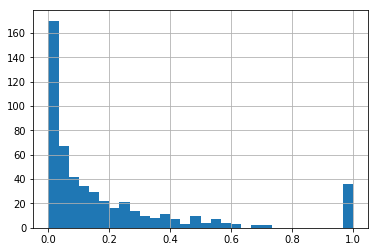

In [12]:
twit_df_all['Agreement'].hist(bins=30)

In [18]:
twit_df_all[(twit_df_all['Agreement'] > 0.2) & (twit_df_all['Bullish_Sum_Bearish'] > 30)].shape

(66, 6)

In [17]:
twit_df_all

,Bearish,Bullish,Bullish_Minus_Bearish,Bullish_Bearish_log_odds,Bullish_Sum_Bearish,Agreement
2019-05-03,111.0,216.0,105.0,0.665748,327.0,0.052955
2019-05-06,84.0,124.0,40.0,0.389465,208.0,0.018665
2019-05-07,110.0,183.0,73.0,0.509006,293.0,0.031534
2019-05-08,206.0,121.0,-85.0,-0.532086,327.0,0.034375
2019-05-09,186.0,83.0,-103.0,-0.806906,269.0,0.076210
2019-05-10,67.0,45.0,-22.0,-0.398030,112.0,0.019482
2019-05-13,70.0,45.0,-25.0,-0.441833,115.0,0.023915
2019-05-14,64.0,92.0,28.0,0.362905,156.0,0.016240
2019-05-15,295.0,244.0,-51.0,-0.189807,539.0,0.004487
2019-05-16,267.0,196.0,-71.0,-0.309134,463.0,0.011828
